# Sentiment Analysis of Stock Markets - Final Report 

# Part 1: Exploratory Data Analysis (Ideas & Description)

In [ ]:
# Retrieving Column Names


!pip3 install pandas
!pip3 install wordcloud
!pip install 'pyLDAvis==2.1.2'
!pip3 install imblearn



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 46.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.1/325.1 kB 70.2 MB/s eta 0:00:00
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=59687b5af387ca5bf82de24944b676f685d146a177db0127029e285ee1dc8297
  Stored in directory: /root/.cache/pip/wheels/59/70/ee/99a0df99d8b4a7b87c79640ebee0927c0f6ccff046e9cc2471
Successfully built pyLDAvis

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from sklearn.model_selection import train_test_split



import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.sklearn
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB


from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/shared-libs/python3.9/py/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Purpose

The purpose of our report is to investigate sentiment analysis's relevance to changes in stock market prices. Our goal is to figure out how much public sentiment, as measured by sentiment analysis, can affect stock prices given the ability of sentiment among investors to influence trading behaviours. We wanted to investigate whether there's any meaningful relationship between the overall tone of market-related social media discourse and the performance of the stock market afterwards. Our project led us to find and learn insightful information about the ability of public opinion to predict financial market movements, which could help investors make better decisions. 

In the end, we found some interesting discoveries, we wanted to not only understand “what” changes occur in the stock market but also to extract insights as to “why” stock markets might change due to public opinion or not change during specific events and periods

### Data Source

Our dataset is taken from Kaggle and the main focus of the dataset was stock-related tweets that span from April 9th 2020 to July 16th 2020. Given the potential for fluctuations in the stock market during this time frame, due to COVID-19 during 2020, this dataset has a lot of information for analysis. Tweets labelled with the S&P 500 Index (#SPX500), the top 25 index constituent companies, and the general "#stocks" hashtag are all included in the dataset.

To determine sentiment, a total of 9917 tweets were collected and categorised, ensuring a high level of accuracy in the sentiment labels that were assigned. A separate ID associated with every tweet, the exact time and date of posting, the content of the tweet, and the sentiment classification—positive, negative or neutral—are all included in the dataset.

In [ ]:
file_name = 'stock_tweets.csv'
df = pd.read_csv(file_name, sep = ';').set_index('id')
df.shape

(5000, 3)

We read the CSV file ('stock_tweets.csv) into a pandas DataFrame with the separator defined as a semicolon and the index set to the 'id' column. The output displayed shows that the DataFrame contains 5000 rows and 3 columns.

In [ ]:
# Retrieving Column Names
column_names = df.columns.to_list()

# Displaying Column Names
for col in column_names:
    print(col)


created_at
text
sentiment


Three columns make up the structure of the DataFrame: "created_at," "text," and "sentiment." We have date-time strings in the 'created_at' column, tweet texts in the 'text' column, and categorical data in the ' sentiment' column that represents each tweet's sentiment. 

In [ ]:
df.head(25)

,created_at,text,sentiment
id,,,
77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
27027,2020-04-12 21:52:56+00:00,RT @QuantTrend: Reduce your portfolio RISK! GO...,positive
472959,2020-06-09 05:23:06+00:00,$863.69 Million in Sales Expected for Spirit A...,positive
392845,2020-06-02 01:12:29+00:00,RT @ArjunKharpal: #Apple has cut the prices of...,negative
313771,2020-05-07 04:58:41+00:00,RT @SMA_alpha: The #CDC U.S. New Case data has...,negative


Here we have a visualisation of the dataset, with each tweet classified into different sentiment classes, using df. head() we are only showcasing the top 25 results. 

### Data Structure

As mentioned, the dataset has a total of 9917 tweets. This results in a sizable amount of data for analysis while keeping a narrow focus on the stock market analysis of sentiment within the specified time frame.

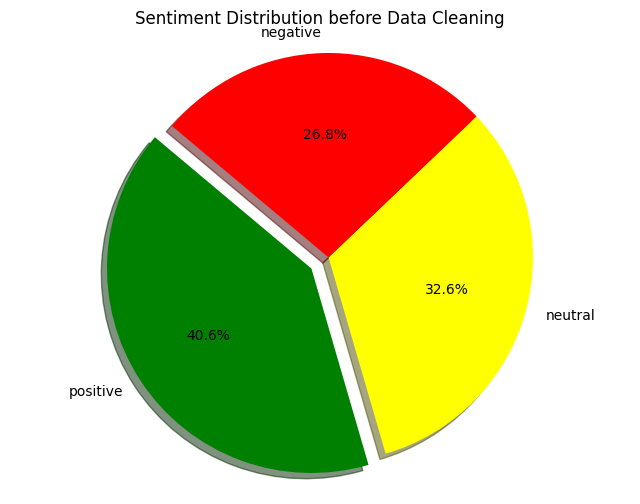

In [ ]:
# Counting the amount of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Defining the colours for each sentiment label
colors = {'negative': 'red', 'positive': 'green', 'neutral': 'yellow'}
sentiment_colors = [colors[label] for label in sentiment_counts.index]

# Plotting the data
labels = sentiment_counts.index
sizes = sentiment_counts.values
explode = (0.1, 0, 0) 

# Creating a pie chart to visualise the sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=sentiment_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution before Data Cleaning')
plt.axis('equal')  
plt.show()



Displayed above is the breakdown of the sentiment before we cleaned our data. We used a pie chart to show the sentiment breakdown of our dataset by showing the distribution of neutral, positive, and negative sentiments. In addition, negative (red) tweets make up 26.8% of the total, positive (green) tweets make up 40.6%, and neutral (yellow) tweets make up 32.6%.

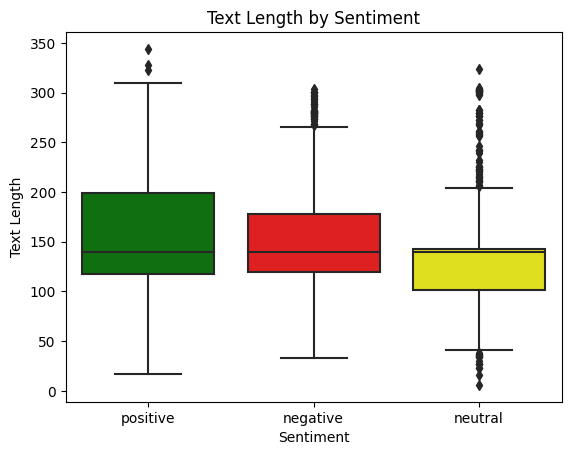

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['text_length'] = df['text'].apply(len)

palette = {"positive": "green", "neutral": "yellow", "negative": "red"}

sns.boxplot(x='sentiment', y='text_length', data=df, palette=palette)

plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.title('Text Length by Sentiment')

plt.show()



From our observations, we can see in the text length by sentiment, that none of the text lengths exceeds 280, this is because of Twitter's character limit of 280, so the text length will never exceed 280 characters. 

Our plots show that, in comparison to the positive and negative tweets, texts with a neutral sentiment are typically longer, as evidenced by the Inter quartile range median and spread. Additionally, there are more outliers with longer texts in the neutral texts. On the other hand, the Inter quartile range for positive and negative sentiments is more close, indicating that there is less variation in text length within these groups. However, compared to positive sentiment texts, negative sentiment texts have a slightly longer median length. We created these box plots to better understand the relationship between sentiment and text length, as well as to identify the types of content found in texts belonging to different sentiment classes

/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecat

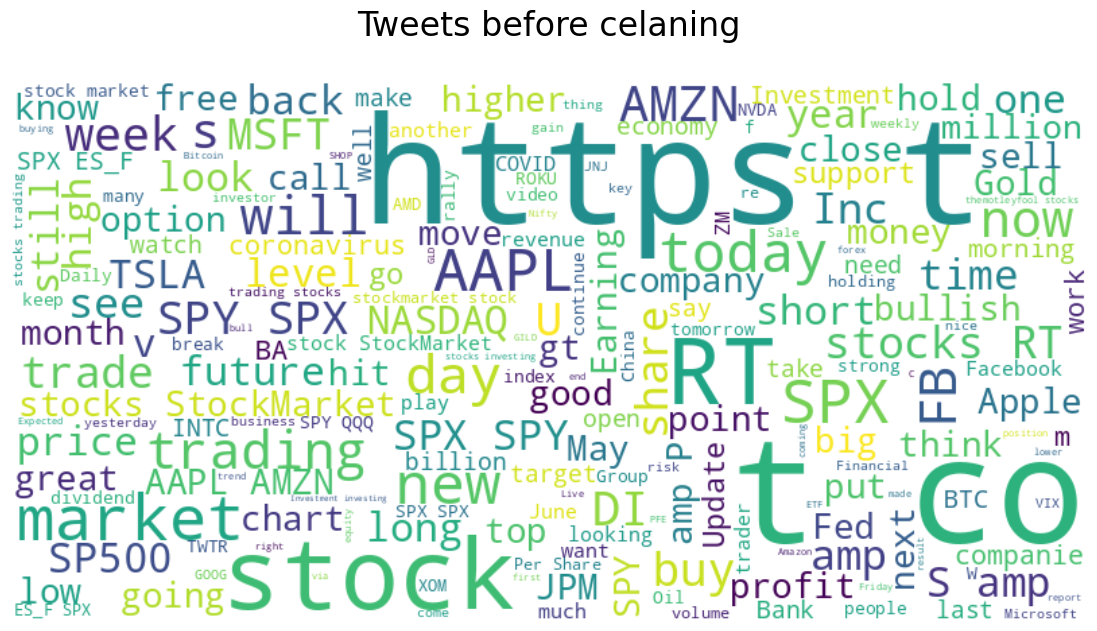

In [ ]:
combined_words = ' '.join([text for text in df['text']])

# Generate a word cloud visual
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(combined_words)

# Displaying the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Tweets before celaning\n', fontsize=24)
plt.axis('off')
plt.show()

Our word cloud is a visualisation of the words that appear most frequently in a collection of stock market-related tweets before any data cleaning processes have been performed. Higher frequency is indicated by larger words, showing which terms are important to the discussions in the dataset. Important terms that are frequently used in connection with stock market activities, including "stock," "market," "trade," "buy," "sell," "SPY," "SPX," "AAPL," and "earning," are visible. Financial terms such as "share," "option," and references to market indices like "SP500" show the importance of trading and investing strategies. Ticker symbols for companies such as "AAPL" (Apple Inc.), "AMZN" (Amazon), "TSLA" (Tesla), "MSFT" (Microsoft), and "FB" (Facebook) show that these companies frequently come up about the stock market. 

### Data Limitations


Acknowledging Data Limitations:

1. Limited Language Scope:
   - Our dataset consists exclusively of English-language tweets.
   - Impact: This limitation excludes sentiment expressed in other languages, which could provide additional insights into global stock market sentiment.

2. Potential for Missing Data:
   - We have missing data in the sentiment column.
   - Impact: Missing data can lead to biased sentiment analysis results if not properly addressed.

3. Timeframe Restrictions:
   - The dataset covers tweets from April 9, 2020, to July 16, 2020.
   - Impact: This short timeframe is influenced by COVID-19


# Part 2: Data Preparation & Cleaning

### Cleaning Steps 

Data cleaning is very important and we must do it before we use this data for our models. Slang, typos, emojis (though we feel we may be able to convert emojis to text instead of getting rid of them), and other acronyms are frequently used in tweets, which can skew or create inaccurate sentiment analysis results. By removing unrelated or misleading information from the data, such as hashtags, user mentions, URLs, and non-textual elements, the text's quality is improved and sentiment precision for classification is increased. 

Breaking text into tokens 

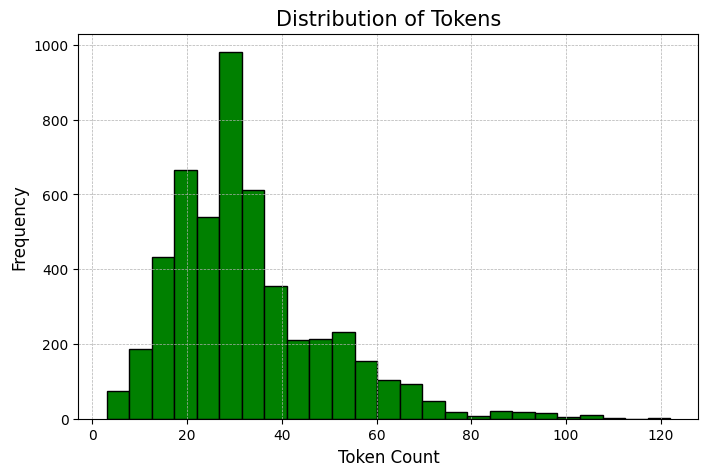

In [ ]:

# We are breaking text into tokens - we are more interested in the text
def tokenize_text(text):
    return word_tokenize(text)

# Applying our function to each piece of text
df['tokens'] = df['text'].apply(tokenize_text)

# We are counting the tokens
df['num_of_tokens'] = df['tokens'].apply(len)
plt.figure(figsize=(8, 5))  
plt.hist(df['num_of_tokens'], bins=25, color='green', edgecolor='black') 


plt.title("Distribution of Tokens", fontsize=15)
plt.xlabel("Token Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


We broke our text into tokens to better understand the actual context behind the tweets. We can learn more about the distribution of tweet lengths by applying the dataset through a tokenization function and calculating the number of tokens per tweet. This distribution is represented by a histogram, which emphasises the short length of most tweets with a token count between 20 and 30 and longer tweets' decreasing frequency that corresponds with Twitter's character limit restrictions of 280 characters.  

Converting Sentiment Classes to integers

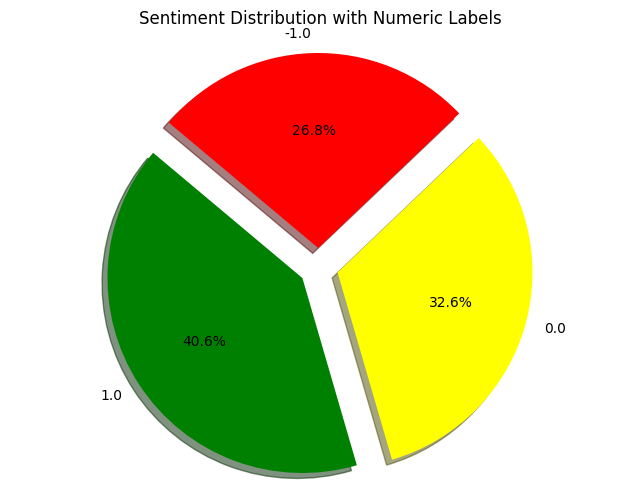

In [ ]:
# We want to map sentiment classes to integers
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0}
df['sentiment_number'] = df['sentiment'].map(sentiment_mapping)
 
# Count the occurrences of each sentiment number
number_counts = df['sentiment_number'].value_counts()
 
# We are defining colours for each sentiment number
number_colors = {-1: 'red', 1: 'green', 0: 'yellow'}
colors = [number_colors[number] for number in number_counts.index]
 
labels = number_counts.index
sizes = number_counts.values
explode = (0.1, 0.1, 0.1)  # Explode all slices for emphasis
 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution with Numeric Labels')
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.show()

For an easier analysis and also because machine models work a lot better with integers compared to text,  we converted the sentiment classes in our dataset into numerical values (1 for positive, -1 for negative, and 0 for neutral). 

Handling null values

In [ ]:
df.fillna(method="ffill", inplace=True)

missing_values = df.isnull().sum()
print(missing_values)


created_at          0
text                0
sentiment           0
text_length         0
tokens              0
num_of_tokens       0
sentiment_number    0
dtype: int64


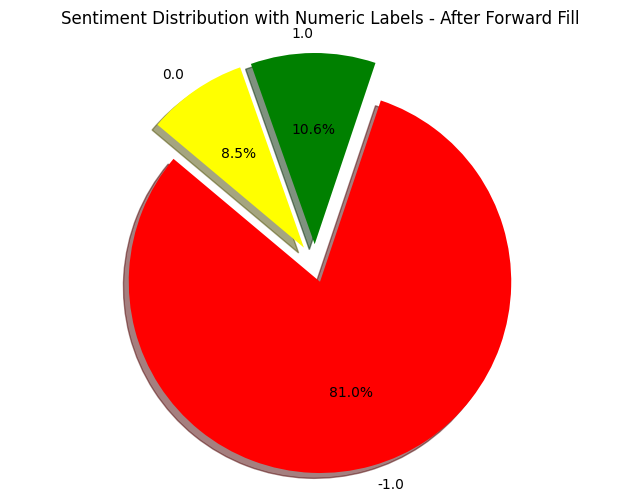

In [ ]:
# Count the occurrences of each sentiment number
number_counts = df['sentiment_number'].value_counts()
 
# We are defining colours for each sentiment number
number_colors = {-1: 'red', 1: 'green', 0: 'yellow'}
colors = [number_colors[number] for number in number_counts.index]
 
labels = number_counts.index
sizes = number_counts.values
explode = (0.1, 0.1, 0.1)  # Explode all slices for emphasis
 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution with Numeric Labels - After Forward Fill')
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.show()

Originally we had approximately 3700 null values within our dataset in the sentiment column out of 9917 data points. This is approximately 37% of our dataset, which we thought was too large of a value to simply drop the data points. 

We used a method named Forward filling. Forward filling (ffill) is the process of replacing each missing value in a column with the most recent non-null value that comes before it. This means that for every missing sentiment value in our dataset, the sentiment of the tweet that comes right before it is used in its place. This solved the missing value issue we had, as we can see, all columns are at 0, which means we successfully do not have missing values anymore. 

As we can see here, the negative class has jumped to 81% - this is not what we want exactly, however, we will be providing solutions to this issue later on in the report. 

Dropping Columns

In [ ]:
df.drop(["created_at"], axis=1, inplace=True)

Within our dataset, we only dropped one column which was the "created_at" column. We did this because this information contains timestamps about each tweet and because our main goal was sentiment analysis, the timestamp of the tweet was not important (however, maybe if we were to compare sentiment from different periods, then this column may have been useful). 

Data Cleaning Process

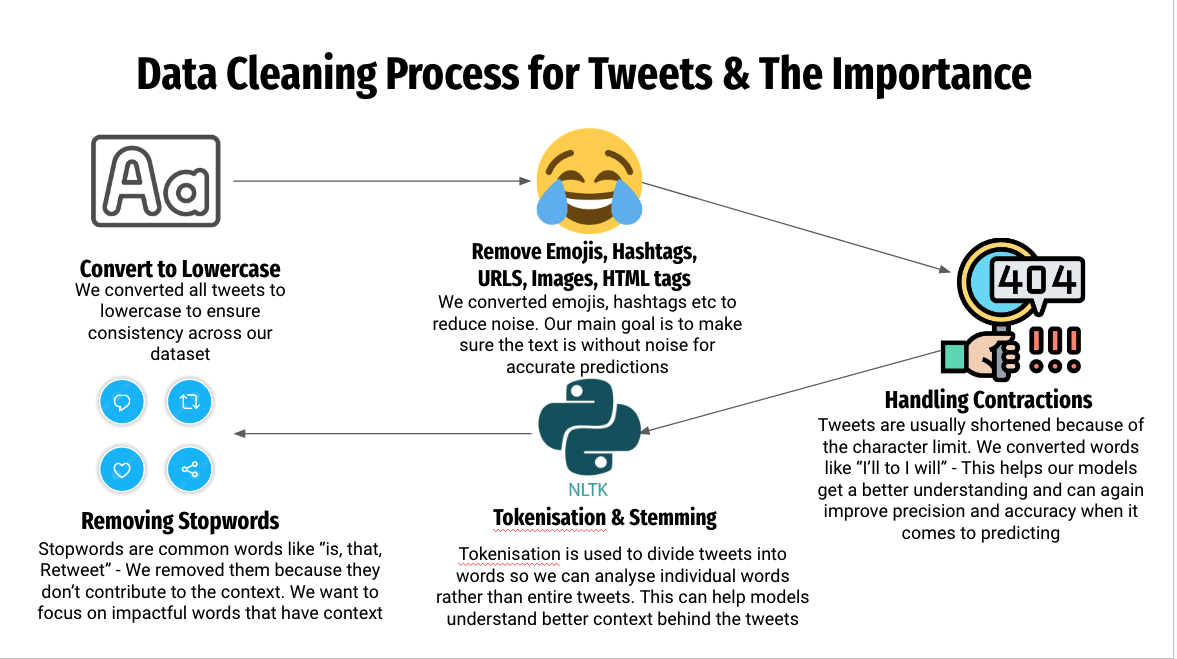

In [ ]:
from IPython.display import Image
Image(filename='presentation_file.png')


In [ ]:
# Dictionary mapping common emojis to their textual representations (we only did the main ones, then we got rid of the rest)
emoji_dict = {
    "😊": "happy",
    "😂": "laughing",
    "😢": "sad",
    "😡": "angry",
    "❤️": "love",
    "😱": "shocked",
    "👍": "thumbs_up",
    "😔": "disappointed",
    "😉": "winking",
    "😎": "cool",
    "📉": "bear",
    "📈": "stock"
}

# Regular expressions for different patterns we might see on twitter
char_only_pattern = re.compile(r'[^a-zA-Z\s]')
hashtag_pattern = re.compile(r'#\w+')
handle_pattern = re.compile(r'@\w+')
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
pic_pattern = re.compile(r'pic\.twitter\.com/.{10}')
special_code_pattern = re.compile(r'(&amp;|&gt;|&lt;)')
tag_pattern = re.compile(r'<.*?>')

# Update stopwords
STOPWORDS = set(stopwords.words('english')).union({'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

# Lemmatiser 
lemmatizer = WordNetLemmatizer()


translator = str.maketrans('', '', string.punctuation)

# Function to convert text to lowercase
def convert_to_lower(phrase):
    return phrase.lower()

# Function to remove punctuation
def remove_punctuation(phrase):
    return phrase.translate(translator)

# Function to clean hashtags
def clean_hashtags(phrase):
    return hashtag_pattern.sub(' ', phrase)

# Function to clean special codes
def clean_special_codes(phrase):
    return special_code_pattern.sub(' ', phrase)

# Updated function to handle emojis
def clean_emojis(phrase):
    for emoji, meaning in emoji_dict.items():
        phrase = phrase.replace(emoji, f' {meaning} ')
    return re.sub(r'[^\w\s,]', '', phrase)

# Function to clean URLs
def clean_urls(phrase):
    return url_pattern.sub('', phrase)

# Function to clean Twitter picture URLs
def clean_pics(phrase):
    return pic_pattern.sub('', phrase)

# Function to clean HTML tags
def clean_html_tags(phrase):
    return tag_pattern.sub(' ', phrase)

# Function to clean Twitter handles
def clean_handles(phrase):
    return handle_pattern.sub('', phrase)

def decontract_text(phrase):
    # Handle contractions (e.g., "won't" -> "will not")
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # Handle specific cases (e.g., "DIS" -> "Disney")
    phrase = re.sub('DIS', 'Disney', phrase)

    # Handle general contractions
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"(he|He)\'s", "he is", phrase)
    phrase = re.sub(r"(she|She)\'s", "she is", phrase)
    phrase = re.sub(r"(it|It)\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"(\'ve|has)", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Function to keep only characters
def keep_only_chars(phrase):
    return char_only_pattern.sub('', phrase)

# Function to remove stopwords
def remove_stopwords(phrase):
    return " ".join([word for word in str(phrase).split() if word not in STOPWORDS])

# Function to tokenize and stem the text
def tokenize_and_stem(phrase):
    tokens = word_tokenize(phrase)
    stem_words = []
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        stem_words.append(word)
    return ' '.join(stem_words)


Above is our cleaning process, our goal was to clean and normalise our text to go through sentiment analysis. Originally, we got rid of all emojis, however, after feedback from the workshop, we decided to map the most important emojis we might see on Twitter to textual representations. Of course, there are thousands of emojis so we only mapped emojis that we felt were relevant to our dataset and then got rid of the rest of the emojis.

Then, different Twitter-specific patterns—like hashtags, handles, URLs, and special HTML codes—that might not be important to sentiment analysis or could introduce noise into the data are found and cleaned.  Our code also modifies a list of stopwords, which are frequently used terms that are typically without sentiment (for example "is", "he" and in Twitter's context - retweet), and are eliminated to minimise noise and to concentrate on meaningful words.

The second cleaning step involves converting the text to lowercase to maintain consistency, eliminating punctuation to avoid misinterpreting tokens, and lemmatising to combine various word forms into their root form, which improves the analysis's accuracy. Additionally, we wanted to handle special cases and contractions, expanding them into their full root form to make their meanings clear. The cleaned text is divided into separate tokens, in the final tokenization step. These are then examined for sentiment analysis


Applying to Text 2

In [ ]:
# Function to clean the text in a DataFrame
def clean_text(df):
    df['text2'] = df['text'].apply(convert_to_lower)
    df['text2'] = df['text2'].apply(clean_emojis)
    df['text2'] = df['text2'].apply(clean_handles)
    df['text2'] = df['text2'].apply(clean_special_codes)
    df['text2'] = df['text2'].apply(clean_hashtags)
    df['text2'] = df['text2'].apply(clean_urls)
    df['text2'] = df['text2'].apply(clean_pics)
    df['text2'] = df['text2'].apply(clean_html_tags)
    df['text2'] = df['text2'].apply(keep_only_chars)
    df['text2'] = df['text2'].apply(remove_punctuation)
    df['text2'] = df['text2'].apply(decontract_text)
    df['text2'] = df['text2'].apply(keep_only_chars)
    df['text2'] = df['text2'].apply(tokenize_and_stem)
    df['text2'] = df['text2'].apply(remove_stopwords)
    
    
clean_text(df)

We created a pipeline for a DataFrame by the clean_text function in the code that we have provided. It does processes like lowercasing, converting emojis, Twitter handles, URLs, special codes, hashtags, and punctuation to maintain consistency and clean the 'text' column. In addition, it applies tokenisation and stemming, expands contractions, and removes non-alphabetic characters. Finally, common stopwords are removed. The text data must be thoroughly cleaned to ensure that our algorithms focus on the important content of the text and are ready for efficient analysis and modelling.

Sample Text of emoji-to-text conversion

In [ ]:
sample_text = "Jordan and Cian are working on a datamining 📈 project, we are very 😊"

# Apply the cleaning functions to the sample text
def clean_sample_text(text):
    text = convert_to_lower(text)
    text = clean_emojis(text)
    text = clean_handles(text)
    text = clean_special_codes(text)
    text = clean_hashtags(text)
    text = clean_urls(text)
    text = clean_pics(text)
    text = clean_html_tags(text)
    text = keep_only_chars(text)
    text = remove_punctuation(text)
    text = decontract_text(text)
    text = keep_only_chars(text)
    text = tokenize_and_stem(text)
    text = remove_stopwords(text)
    return text

cleaned_sample_text = clean_sample_text(sample_text)

print("Original Sample Text:", sample_text)
print("Cleaned Sample Text:", cleaned_sample_text)



Original Sample Text: Jordan and Cian are working on a datamining 📈 project, we are very 😊
Cleaned Sample Text: jordan cian working datamining stock project happy


We wanted to test to see if the emoji-to-text conversion was working as we expected so we created a sample text to utilise emojis. As you can see in the results in the "Cleaned Sample Text" snippet, we are successfully converting emojis to text representations

Comparing uncleaned tweets to cleaned tweets

In [ ]:
# Randomly sample 5 tweets from the dataframe
sample_tweets = df.sample(5)

# Displaying original vs cleaned tweets
for index, row in sample_tweets.iterrows():
    print("Original Tweet:", row['text'])
    print("Cleaned Tweet:", row['text2'])
    print("-" * 50)

Original Tweet: RT @ceteraIM: The #SP500 recorded a positive return for the 2nd straight month in May, following negative returns in Q1. Mid cap #stocks le…
Cleaned Tweet: ceteraim sp recorded positive return nd straight month may following negative return q mid cap stock le
--------------------------------------------------
Original Tweet: Godrej Consumer Products Limited
#GODREJCP
Recommended  on 14th May at 566
CMP: 679.
Profit of 20% in 28 Trading Day.
#Stocktotrade #Stockstowatch #stocks #Nifty   #nifty50 #stockmarket #stockstowatch #stockmarketnews #stocks #stockstotrade https://t.co/IWLcaKsL5i
Cleaned Tweet: godrej consumer product limited godrejcp recommended th may cmp profit trading day stocktotrade stockstowatch stock nifty nifty stockmarket stockstowatch stockmarketnews stock stockstotrade httpstcoiwlcaksli
--------------------------------------------------
Original Tweet: $aapl cut put here, get 370c jun 26 at 2.99 https://t.co/wIdJW4r2yr
Cleaned Tweet: aapl cut put get c 

Above is a comparison of the original tweets from the dataset and a tweet after it has gone through standard cleaning procedures, which is an essential step in preparing data for ensuing natural language processing (NLP) tasks, as shown in the text preprocessing results that we have presented. The original dataset, which consists of tweets, demonstrates common elements of social media text, such as user mentions, hyperlinks, stock market symbols, and acronyms. Despite being important to human communication on social media (mainly because of character limits), these components have the potential to significantly increase noise.

The implemented cleaning processes successfully remove any elements from the tweets that could negatively impact the functionality of our models. The algorithms can concentrate on the important content of the tweets that have context relating to stock markets by removing user mentions and URLs. We also observed that terms related to trading and the stock market—like stock symbols and mentions of market changes—remain. The parts of the text which have strong context,  remain intact thanks to our cleaning process


Wordcloud of cleaned tweets

/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/w

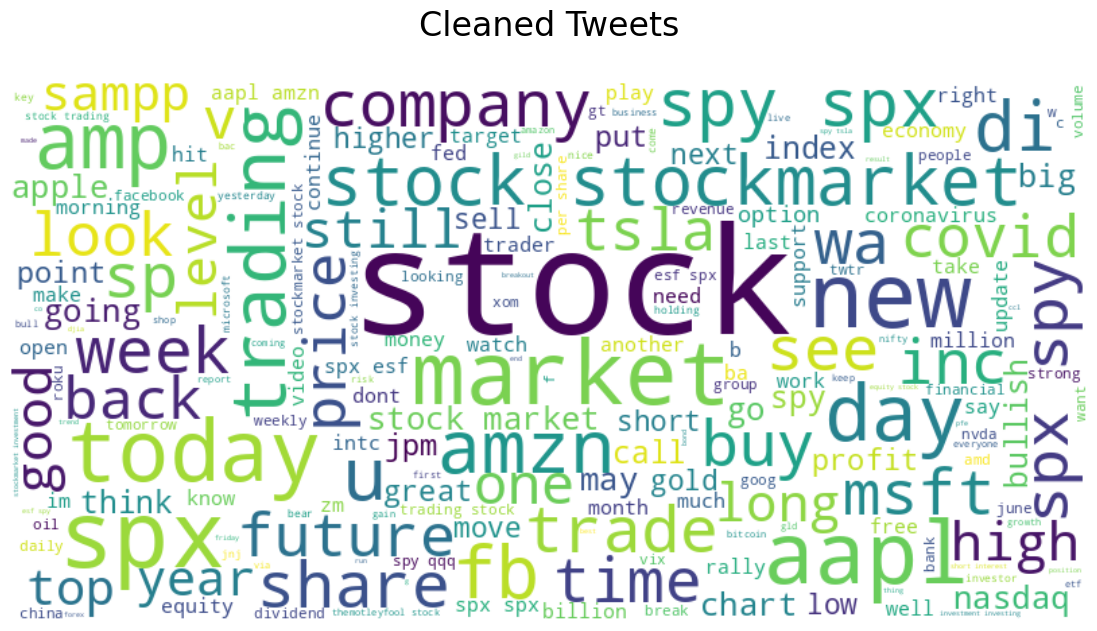

In [ ]:
# Generate the word cloud using the 'text2' column
words = ' '.join([text for text in df['text2']])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110)\
    .generate(words)


# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Cleaned Tweets\n', fontsize=24)
plt.axis('off')
plt.show()


We created another word cloud which displays only cleaned tweets. The word cloud we have above showcases a word cloud of tweets before cleaning, in this word cloud, only terms that have strong context are displayed such as "trading" and "stock"

### Text Vectorisation 

Initialising TF-IDF Vectoriser

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,          # Maximum number of features
    ngram_range=(1, 2),         # Consider unigrams and bigrams
    stop_words='english',      # Remove common English stopwords
    tokenizer=word_tokenize,    # Use NLTK tokenizer
    max_df=0.85,                # Ignore terms that appear in more than 85% of documents
    min_df=2,                   # Ignore terms that appear in fewer than 2 documents
)

Mainly, because our dataset focuses on text rather than numbers, analysis and putting our dataset through different models can be quite ineffective, because machine learning models work a lot better with numbers rather than text. This is why we decided to use a natural language processing technique called Term Frequency - Inverse Document Frequency, to convert our text into numerical representations. 

Our text data is converted into a numerical format that machine learning models can understand by initialising the TF-IDF Vectorizer with specified parameters. We reduce dimensionality and CPU usage by limiting the vocabulary to the most relevant terms by setting max_features to 5000. To capture context that might be missed when only single words are taken into account, the ngram_range parameter takes into account both single words and bigrams. The text is consistently divided into tokens because of the use of the NLTK tokenizer. By filtering out terms that are either too common or too rare, the max_df and min_df parameters help to improve the text data by lowering noise.


In [ ]:
X = tfidf_vectorizer.fit_transform(df['text2'])
y = df['sentiment_number']

We then compute the TF-IDF scores for the preprocessed text data, converting it into a matrix of features, while we also capture the corresponding sentiment labels - -1(negative), 1 (positive), 0(negative). This conversion is important because it gives the text's content an organised, measurable representation, which is needed when feeding the text into sentiment analysis algorithms.

Showcasing the most common terms and highest-ranked terms

Document 1: amp learn, enter, market crash, token, yo
Document 2: economy stock, tax, effect, fuel, removed
Document 3: new time, fiscal, fin, issuance, gt
Document 4: help, ip, tool, httpstco, running
Document 5: looking, track, launch, stock cnbc, amd
Document 6: amp, deficit, central bank, expansion, quanttrend
Document 7: quarter, sale expected, spr, million sale, spirit
Document 8: cut, range, n, iphone, discount
Document 9: lag, new, case, data, new case
Document 10: read, stock business, etf investing, read gt, business news

Top 10 terms with highest average TF-IDF scores: today, msft, trading, fb, market, amzn, spy, aapl, spx, stock
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 i

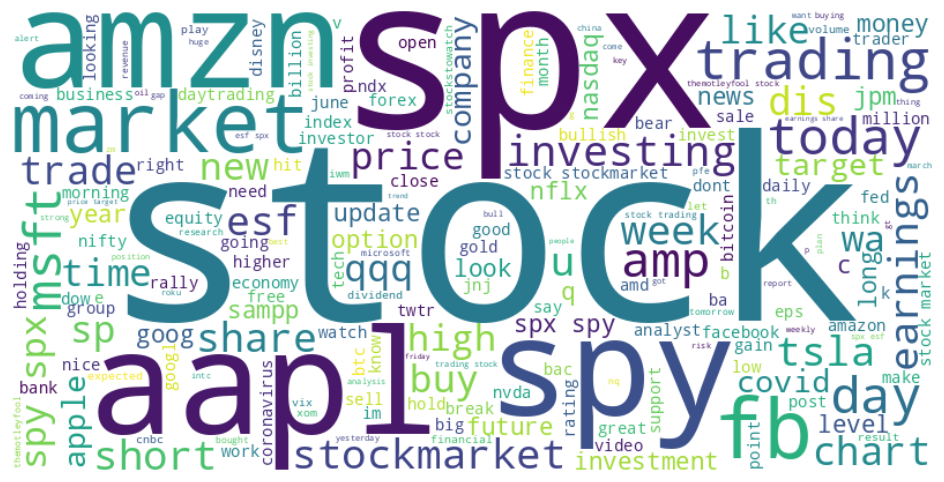

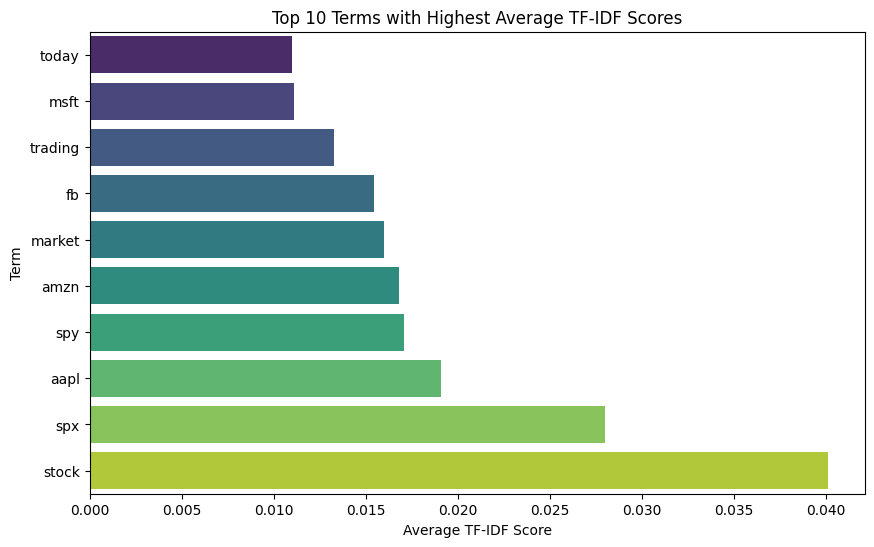

In [ ]:
# 1. Top Terms per Document:
def top_terms_per_document(X, features, n=5):
    # Get the indices that would sort the TF-IDF array
    sorted_indices = np.argsort(X.toarray(), axis=1)[:, -n:]
    
    top_terms = []
    for doc, indices in enumerate(sorted_indices):
        terms = [features[i] for i in indices]
        top_terms.append(terms)
    
    return top_terms

# Get feature names (terms)
features = tfidf_vectorizer.get_feature_names_out()

# Get top 5 terms for the first 10 documents
top_terms = top_terms_per_document(X, features, 5)
for i, terms in enumerate(top_terms[:10]):
    print(f"Document {i+1}: {', '.join(terms)}")

# 2. Top Terms Across All Documents:
def top_avg_terms(X, features, n=10):
    # Calculate the mean for each term across all documents
    avg_scores = np.mean(X.toarray(), axis=0)
    
    # Get the indices that would sort the average scores
    sorted_indices = np.argsort(avg_scores)[-n:]
    
    return [features[i] for i in sorted_indices]

top_avg = top_avg_terms(X, features, 10)
print(f"\nTop 10 terms with highest average TF-IDF scores: {', '.join(top_avg)}")

# 3. Visualize TF-IDF Scores:
def plot_word_cloud(X, features):
    # Calculate the sum of TF-IDF scores for each term
    scores = np.sum(X.toarray(), axis=0)
    
    # Create a dictionary of terms and their scores
    term_scores = {features[i]: scores[i] for i in range(len(features))}
    
    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_scores)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(X, features)

# ... [Your previous code]


# Function to visualize top terms with highest average TF-IDF scores
def visualize_top_avg_terms(X, features, n=10):
    # Calculate the mean for each term across all documents
    avg_scores = np.mean(X.toarray(), axis=0)
    
    # Get the indices that would sort the average scores
    sorted_indices = np.argsort(avg_scores)[-n:]
    
    # Extract the top terms and their scores
    top_terms = [features[i] for i in sorted_indices]
    top_scores = [avg_scores[i] for i in sorted_indices]
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_scores, y=top_terms, palette="viridis")
    plt.xlabel('Average TF-IDF Score')
    plt.ylabel('Term')
    plt.title(f'Top {n} Terms with Highest Average TF-IDF Scores')
    plt.show()

visualize_top_avg_terms(X, features, 10)

Our goal here was to find terms that were the most important within our dataset. The top ten terms with the highest average TF-IDF (Term Frequency-Inverse Document Frequency) scores are displayed in a bar chart.  'Stock' seems to have the highest average TF-IDF score, suggesting that it is a significant term that appears frequently but selectively in the documents. 'spx' and 'aapl', which are acronyms for the S&P 500 index and Apple Inc., as well, come next. These results make sense as Apple and S&P are very heavily connected to the stock market


The terms "spy," "amzn," "market," "fb," "trading," "msft," and "today" are among the other terms in the chart. These are primarily associated with the financial and technology domains;'spy' is associated with the SPDR S&P 500 ETF, 'amzn' with Amazon, 'fb' with Facebook, and'msft' with Microsoft. These terms' high TF-IDF scores highlight their significance within the dataset and also an indication of topics that are trending or that are frequently brought up in the financial discourse during the dataset's period, since this was during 2020, these companies might have been very topical during the COVID-19 era. 

Terms that co-occur with the word stock

In [ ]:

def find_cooccurring_words(df, target_word, window_size=2):
    cooccurring_words = Counter()
    text_combinations = []

    for text in df['text2']:
        words = word_tokenize(text)
        for i, word in enumerate(words):
            if word.lower() == target_word:
                start = max(i - window_size, 0)
                end = min(i + window_size + 1, len(words))
                context = words[start:end]
                text_combinations.append(' '.join(context))
                cooccurring_words.update([words[j] for j in range(start, end) if j != i])

    return cooccurring_words, text_combinations

# Assuming 'df' is your DataFrame and it has a preprocessed column 'text2'
cooccurring_words, text_combinations = find_cooccurring_words(df, 'stock')

print("Most Common Co-occurring Words with 'stock':")
for word, count in cooccurring_words.most_common(10):
    print(f"{word}: {count}")

print("\nText Combinations with 'stock':")
for combination in text_combinations[:10]:  # Display first 10 combinations
    print(combination)


Most Common Co-occurring Words with 'stock':
stockmarket: 312
stock: 222
market: 178
trading: 172
investing: 153
investment: 95
share: 65
equity: 60
stockstowatch: 60
themotleyfool: 54

Text Combinations with 'stock':
token u stock market crash
tax economy stock stockmarket
gt risk stock emfx correct
ycc gt stock new time
httpstcoyyyvxovyj madtweets stock cnbc amd
quarter httpstcozoqbvspvsj stock
etf investing stock business news
nifty banknifty stock
market spx stock day much
banknifty equity stock analysis trading


/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:5

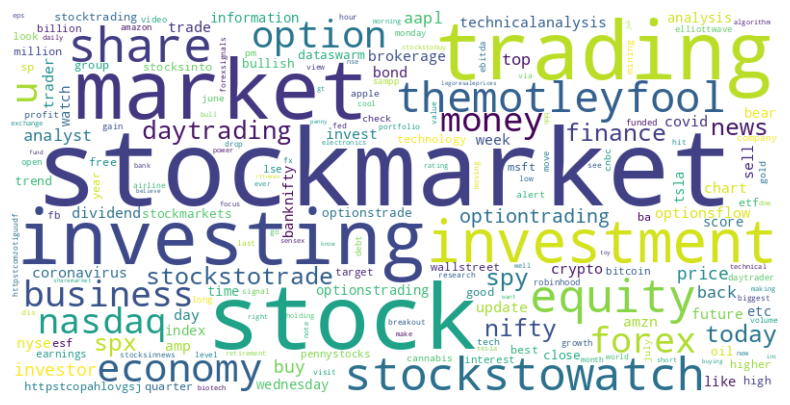

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cooccurring_words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We wanted to further analyse the term "stock" - since this term is the main term of our dataset, we wanted to see terms that were frequently used with the term "stock". 

As displayed above, the text output shows a frequency analysis of words that frequently occur with the term "stock". 'Stockmarket' is the most commonly occurring co-occurring term, which shows us that this term is more often focused on the market's overall activities than specific stocks. The terms "stock," "market," and "trading," which stand alone, come next, all of which point out the importance of market dynamics and trading itself. The text's focus on investments is further highlighted by other important terms like "investing," "investment," "share," and "equity," as well as specific references like "stockstowatch" and "themotleyfool," that refer to well-known investment advice platforms. This was an interesting analysis because we got to see which terms are most important to the term 'stock'.

### Feature Engineering

Topic Modelling 

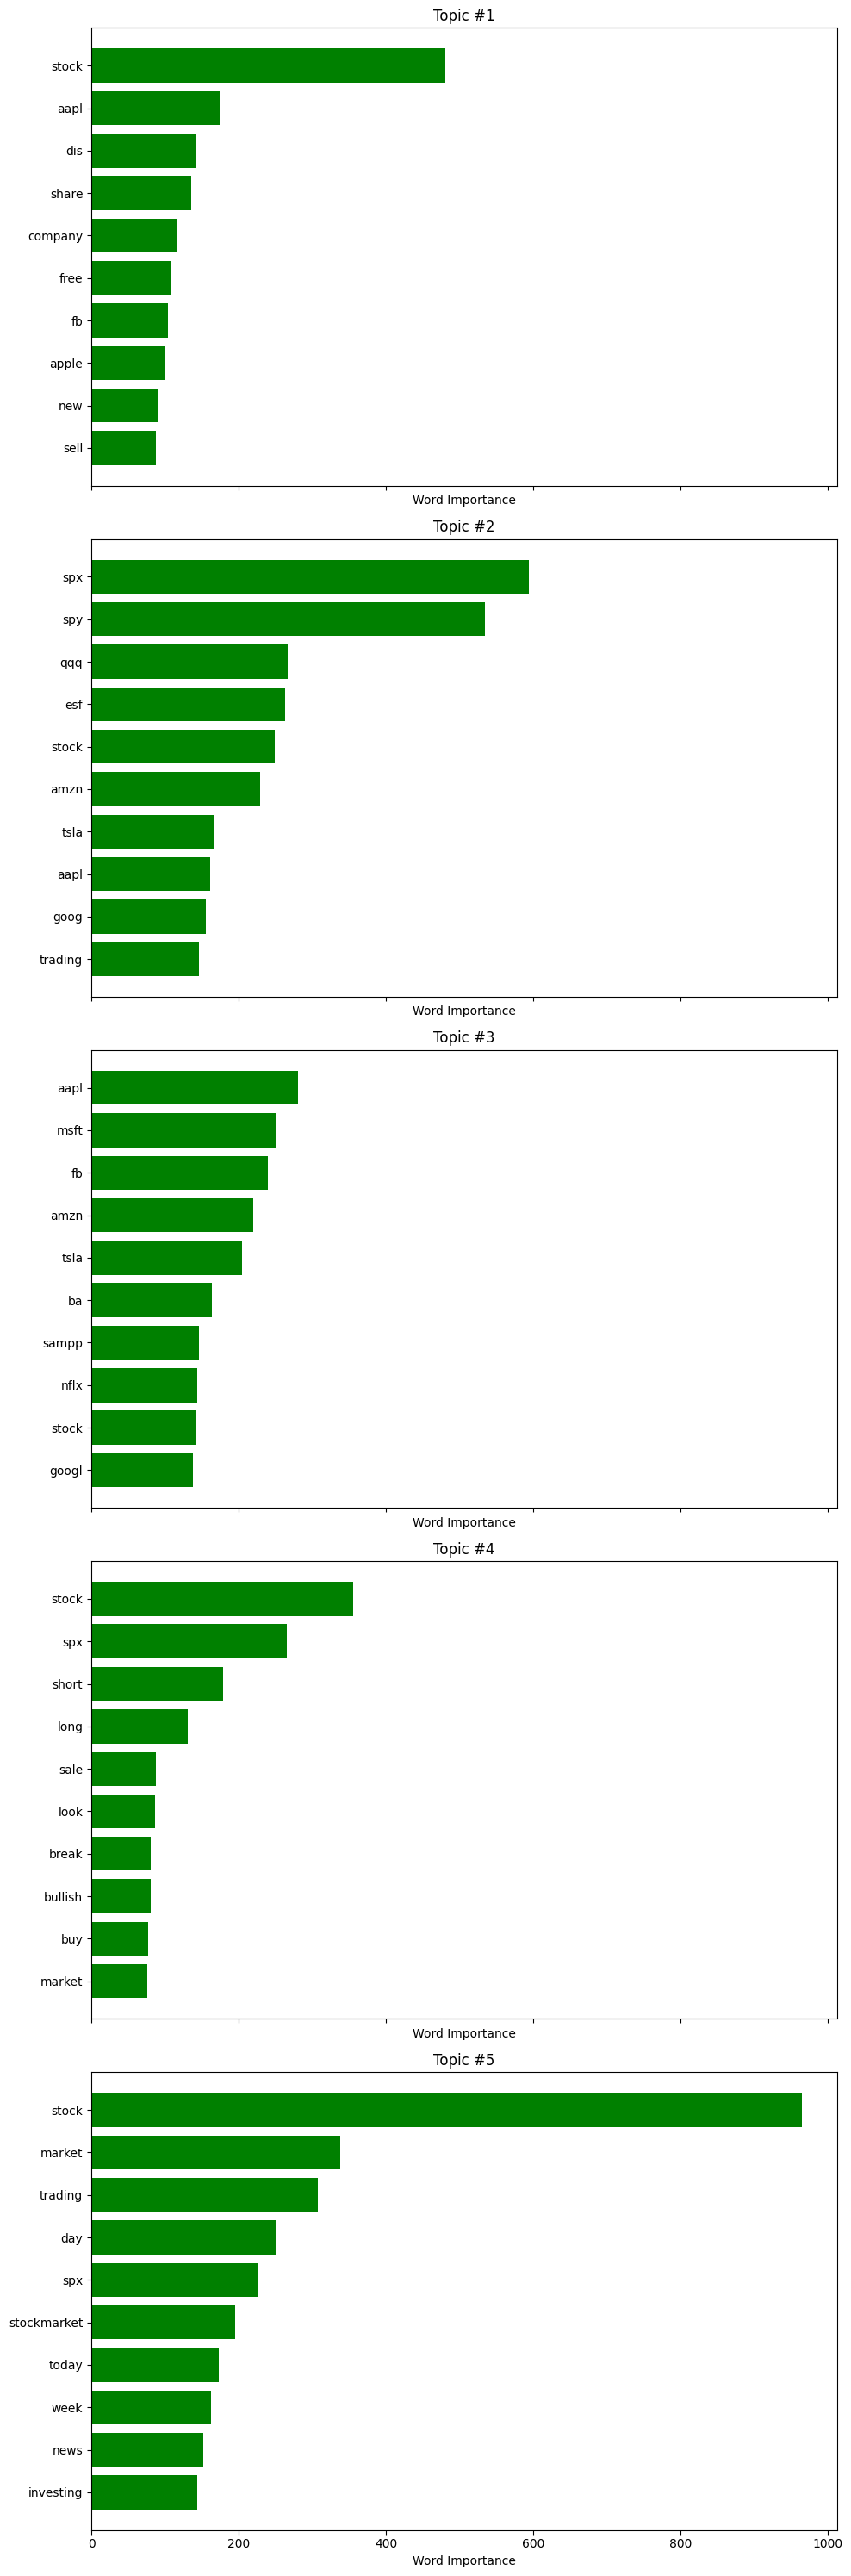

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df['text2'] contains the preprocessed text

# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_vectorized = vectorizer.fit_transform(df['text2'])

# Number of topics for LDA
num_topics = 5

# Initialize LDA Model
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online')
lda.fit(data_vectorized)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Number of top words to display for each topic
top_n_words = 10

# Create subplots for each topic
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6*num_topics), sharex=True)

# Iterate through each topic
for topic_idx, topic in enumerate(lda.components_):
    # Get the top words and their corresponding scores
    top_word_indices = topic.argsort()[:-top_n_words - 1:-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_word_scores = [topic[i] for i in top_word_indices]

    # Create a horizontal bar chart for the current topic
    ax = axes[topic_idx]
    ax.barh(top_words, top_word_scores, color='green')
    ax.invert_yaxis()  # Invert the y-axis to show the most important words at the top
    ax.set_xlabel('Word Importance')
    ax.set_title(f'Topic #{topic_idx + 1}')

plt.tight_layout()
plt.show()



We did a form of topic modelling, and this was important to identify which terms were usually together and we divided these terms into different topics. For example, as we can see in topic 1, that the term distribution for the first topic is created from a topic modelling algorithm. 'Spx' and'spy' are common terms in this topic, Words with chronological meanings like "day," "week," and "today" show us that the focus is on short-term occurrences (maybe short-term investors?) or shifts in markets. In addition, the term 'profit' corresponds with financial performance and returns, which are essential in discussions about investments and stock markets

### Observations 

Exploratory Data Analysis:
The dataset's structure was revealed during the exploratory phase, which also revealed a sizable amount of data with a balanced representation of sentiments. The main patterns and sentiments found in the dataset were first visualised using word clouds and sentiment distribution charts.

Data Preparation & Cleaning:
The data cleaning process was tasking, involving tokenisation, handling of null values, and normalisation of text. Emojis were converted to text, and other noise elements were removed to ensure the cleanliness of the data for analysis.

Vectorisation & Feature Engineering:
We applied TF-IDF vectorisation which transformed the textual data into a numerical format suitable for machine learning models. Feature engineering, including topic modeling, further refined the dataset by identifying underlying themes and groupings within the tweets.

What we Learned

We learned, that a lot of cleaning is needed for a twitter dataset, this is because social media text is noisy and unstructured, we learned that a  Twitter dataset usually requires a lot of cleaning. The accuracy of text analysis tasks can be affected by a variety of issues found in Twitter data, including misspellings, slang, abbreviations, emojis, hashtags, mentions, and irrelevant characters - all which we had to find ways to clean

# Part 3: Data Splitting 

Split Data into Training, Testing and Validation Sets

In [ ]:

# Assuming df is your DataFrame and 'text2' is the feature column, 'sentiment' is the target
X = df['text2']
y = df['sentiment_number']

# First split: separate out a test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 3000
Validation set size: 1000
Test set size: 1000


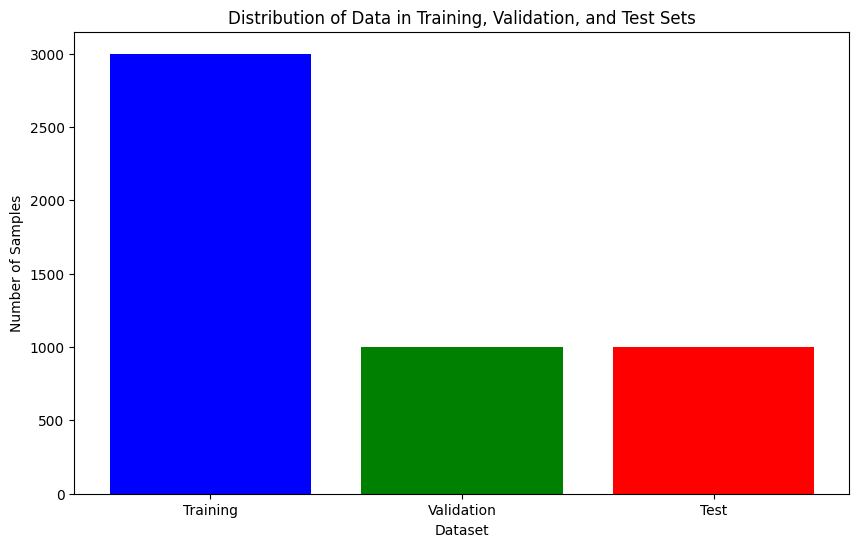

In [ ]:
# Sizes of each set
sizes = [len(X_train), len(X_val), len(X_test)]
labels = ['Training', 'Validation', 'Test']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Distribution of Data in Training, Validation, and Test Sets')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset')

# Show the plot
plt.show()


The distribution of data samples among the three different sets—Training, Validation, and Test—used for model training and evaluation can be seen in the bar chart. To make sure the model has enough data to learn from, machine learning commonly uses the training set with the greatest number of samples. 

We decided to go for a 60-20-20 split rather than the typical 80-20 split, we did this because we wanted a validation set which could later be used for hyperparameter tuning where the largest portion is reserved for training, and the remainder is evenly split for validation and testing. So in the end our split ratio is 60% training, 20% testing and 20% validation. Hyeprameter tuning was also considered in case of a scenario where overfitting occurs

Using Smote to fix class imbalance issues

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df['text2'] is your features and df['sentiment_number'] is the integer-encoded labels
X_train, X_temp, y_train, y_temp = train_test_split(df['text2'], df['sentiment_number'], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize TF-IDF Vectorizer and transform the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', tokenizer=word_tokenize, max_df=0.85, min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Now X_train_smote and y_train_smote are your training data and labels, balanced by SMOTE



We used SMOTE to tackle class imbalance issues we had. This is because after forward fill, the remaining null values went to the negative class, which meant we had over 80% in the minority class which wasn't what we wanted

SMOTE is applied only to the training data. It synthesises new examples in the feature space for the minority class, attempting to create a balanced representation of each class. This balancing is done to improve the model's ability to generalise and not be biased toward the majority class (in this case, this became "negative" after using forward fill).

The consistency of the process is guaranteed by the random_state=42 parameter. Every time the code is executed, the same splits and synthetic samples are produced because the train_test_split and SMOTE functions use the same random state.


SMOTE is not applied to the validation and test sets, as our validation and testing sets should reflect the true distribution of the original dataset to properly evaluate the model's performance. This is why we applied it to the training set only. We also do not want to apply SMOTE to our actual dataset because we want to make sure the original dataset is the same to prevent overfitting

Examining Distribution after SMOTE

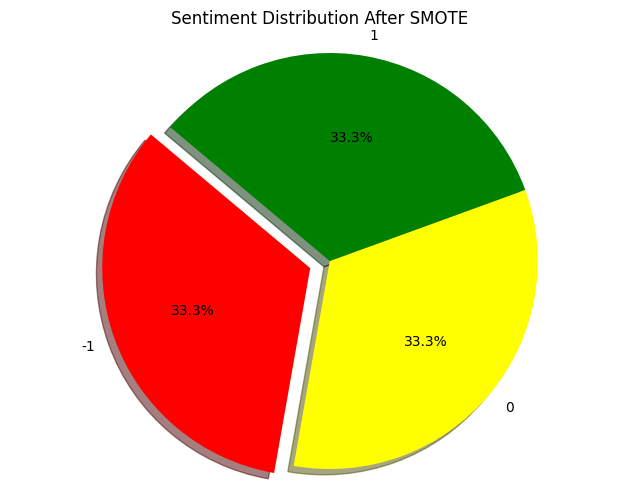

In [ ]:
# Count the occurrences of each sentiment number in the resampled dataset
unique_resampled, counts_resampled = np.unique(y_train_smote, return_counts=True)
class_counts_resampled = dict(zip(unique_resampled, counts_resampled))

# We are defining colours for each sentiment number
number_colors = {-1: 'red', 1: 'green', 0: 'yellow'}

# Preparing colors, labels, and sizes for the pie chart
colors_resampled = [number_colors[number] for number in unique_resampled]
labels_resampled = ['-1', '0', '1']
sizes_resampled = [class_counts_resampled[number] for number in unique_resampled]
explode_resampled = (0.1, 0, 0)  # Explode first slice for emphasis

# Plot for resampled data
plt.figure(figsize=(8, 6))
plt.pie(sizes_resampled, explode=explode_resampled, labels=labels_resampled, colors=colors_resampled, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution After SMOTE')
plt.axis('equal')
plt.show()



After we applied SMOTE we created another pie chart and as you can see, we noticed some changes. 

Balanced Classes: Each sentiment class (-1, 0, 1) now makes up exactly one-third of the dataset, which shows us that SMOTE has been used to equalise the number of samples across the three sentiment categories. This is what we wanted, we now have an equal dataset and the class imbalance issues have me tackled

Equal Representation: The sentiment classes of (-1), neutral (0), and positive (1), are equally represented in the dataset post-SMOTE This equal representation is important for training machine learning models that perform well across all sentiment classes, and again to prevent bias.

Model Analysis: Now that we have the class imbalance resolved, our sets can now go through feature selection, model fitting, and evaluation, without the concern of imbalanced class distribution skewing the results.

Further Explanation of SMOTE

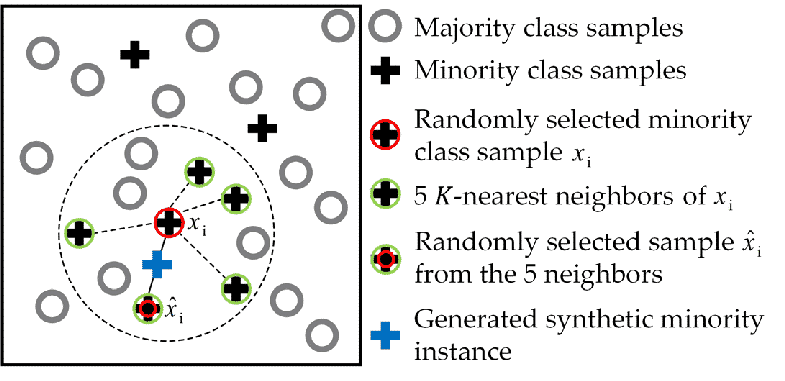

In [ ]:
from IPython.display import Image
Image(filename='smote.png')


Further explanation on SMOTE and how it works 

1. A minority class is chosen at random (so in our case, positive class after forward fill)

2. The 5 nearest neighbours of x are identified 

3. One of the 5 neighbors is randomly selected

4. Synthetic information is generated which is shown by the blue plus sign

# Part 4: Algorithm Description

### Naive Bayes

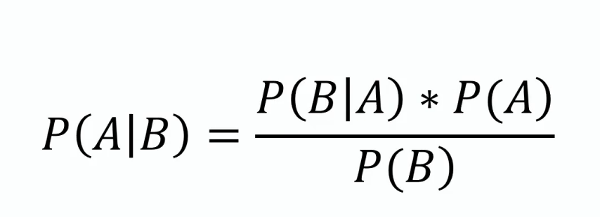

In [ ]:
from IPython.display import Image
Image(filename='naive.png')

The first algorithm we decided to use against our cleaned dataset was the Naive Bayes algorithm. We decided to use Naive Bayes first because of the model's effectiveness, simplicity, and efficiency, we learned that Naive Bayes is frequently used, especially when working with text data where the underlying classes may be determined from the conditional probabilities of the features. We thought that considering this information, it would be an excellent choice for sentiment analysis

Algorithm: Naive Bayes, based on Bayes' theorem (P(A|B) = (P(B|A) * P(A)) / P(B)), predicts event A given event B, where A is the class label and B represents the data.

Benefits: It's fast, straightforward, and effective for large datasets with text data, which is what we are using. It works under the assumption that features are independent of each other.

Outcome: Despite its simplicity, Naive Bayes can often rival more complex models such as deep learning models like transformers models. It strikes a good balance between speed and predictive accuracy, we felt this made it a good choice for our project

Setting up the Naive Bayes Model

In [ ]:
# Initialize the Naive Bayes model

X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_smote, y_train_smote)


MultinomialNB()

Here, we have successfully initialised and fitted a Naive Bayes classifier for our text classification task. The MultinomialNB model from the sklearn.naive_bayes module is used here following the vectorisation of our text data that we did earlier using TFIDF. Particularly, we have transformed our validation and test data subsets using the TfidfVectorizer, ensuring that numerical data is input into the algorithm.

Our model has been trained on a balanced dataset created by applying the Synthetic Minority Over-sampling Technique (SMOTE) to the training data. This approach helps to tackle the issue of class imbalance, as mentioned earlier - this provides a strong set of data for the model to learn from. The fit function is then used to train the MultinomialNB classifier on this SMOTE-balanced dataset. With this setup, we hope that the model will generalise well on unseen data since we have a balanced dataset

Cross Validation & Hyperameter Tuning

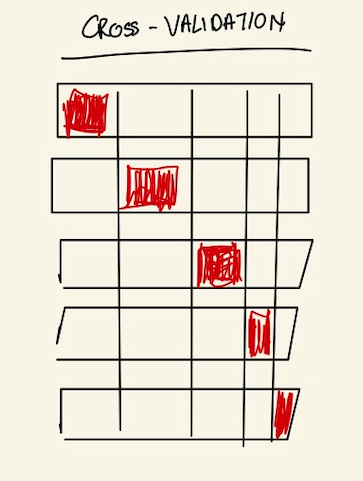

In [ ]:
from IPython.display import Image
Image(filename='cross.png')

We created a quick sketch of how cross-validation works. The dataset is divided into several segments, each of which is used once for validation and the remaining segments make up the training set. The section of data used for validation in each iteration is indicated by the red markings. To use every segment of the data as a validation set once, this process is repeated multiple times. Along with reducing overfitting, cross-validation produces a more accurate indication of a model's ability to predict. However, as we go through the report, we didn't use cross-validation for all the models. Since hyperparameter tuning is a form of cross-validation, we did not use it for naive Bayes, since our tuning takes care of that


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline with TfidfVectorizer, SMOTE, and MultinomialNB
pipeline = make_imb_pipeline(TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', tokenizer=word_tokenize, max_df=0.85, min_df=2),
                             SMOTE(random_state=42),
                             MultinomialNB())

# Define the parameter grid
param_grid = {
    'multinomialnb__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]  # Add more values as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Assuming df['text2'] is your features and df['sentiment_number'] is the integer-encoded labels
X = df['text2']
y = df['sentiment_number']

# Perform grid search
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

# Print best alpha
print("Best alpha:", grid_search.best_params_['multinomialnb__alpha'])


    

Best alpha: 0.01


We used a pipeline optimisation approach using GridSearchCV to find the optimal hyperparameters for a text classification model. The pipeline integrates TfidfVectorizer for feature extraction from text data, SMOTE for addressing class imbalance by oversampling the minority class, and MultinomialNB, a Naive Bayes classifier suitable for text classification tasks.

A range of values for analysis was defined for the MultinomialNB classifier's hyperparameter alpha in the parameter grid. This hyperparameter controls the level of smoothing that is applied to the model and, by preventing zero probabilities in following calculations, can have an important effect on performance.

A 5-fold cross-validation was used to assess the accuracy of different hyperparameter configurations. This method splits the dataset into five distinct subsets, using each in turn for validation while training on the remaining four. This was why we did not apply cross-validation because tuning takes care of this part

We found the best alpha to be 0.01, this means we had to tune our model to 0.01 for the best results possible

Classification Report

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)


# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

        -1.0       0.99      0.83      0.90       798
         0.0       0.61      0.93      0.74        92
         1.0       0.57      0.95      0.71       110

    accuracy                           0.85      1000
   macro avg       0.72      0.91      0.78      1000
weighted avg       0.90      0.85      0.87      1000



The classification report provides us with a summary of the performance metrics for our analysis on the test dataset. The model appears to excel at identifying the negative class (-1.0), as indicated by the high precision of 0.99, which tells us that 99% of instances predicted as negative are indeed negative. However, the recall for the neutral class (0.0) is notably high at 0.93, showing that the model is capable of identifying most of the actual neutral samples.

On the other hand, the neutral and positive classes (0.0 and 1.0) have lower precision, at 0.61 and 0.57, as well. This could show that the model is more cautious in its prediction of neutral sentiments because it has a tendency to mistakenly classify true negatives or positives as neutral.

The F1-scores, which balance precision and recall, are relatively high across all classes, with the negative class achieving the highest F1-score of 0.90, indicating a well-balanced precision and recall for this class.

The accuracy of the model is 0.85, reflecting the proportion of total correct predictions. The macro average F1-score is 0.78, which is lower than the accuracy, indicating some imbalance in the performance across classes, it's interesting that there is still some slight imbalance after using SMOTE. The weighted average considers class imbalance by weighting the F1-score by the number of true instances for each class, resulting in a slightly higher score of 0.87.

Overall, while the Naive Bayes model shows strong recall, it shows varying precision across classes, which is an area that could be improved, potentially by further tuning or by using a different modeling approach, of course, there are endless of ways we can improve and tune our models to get the best results possible, but also a very time consuming task. The high macro average recall indicates that the model is quite good at detecting the relevant class but may benefit from improvements in precision.

Confusion Matrix

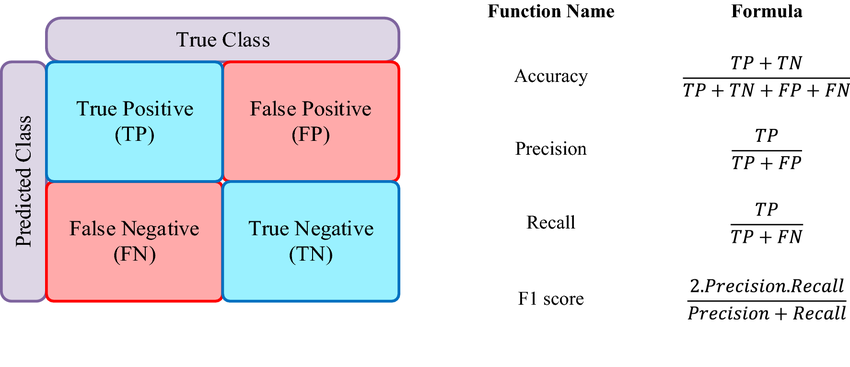

In [ ]:
from IPython.display import Image
Image(filename='confusion.png')

Next we found the true positive, false positive, false negatives and true negative ratesin the form of a confusin matrix. A confuson matrix is extremely helpful in showing a visual representation of the performance of the algoirhtm. It also shows the actual versus predicted classifications with true positives, true negatives, false positives, and false negatives. This matrix is useful because it not only reveals the number of correct and incorrect predictions but also the types of errors made

From the confusion matrix, we can tell the following observations:

True Positives (TP) indicate the number of instances correctly predicted as positive.
False Positives (FP) denote instances incorrectly predicted as positive when they are not.
False Negatives (FN) are instances that are incorrectly predicted as negative when they are positive.
True Negatives (TN) represent the number of instances correctly predicted as negative.
The formulas to the right of the matrix are used to calculate the respective performance metrics such as recall and precision

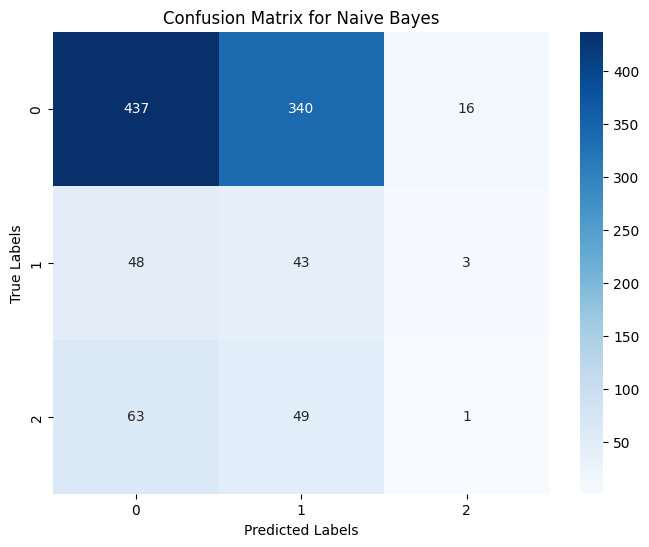

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




From our confuson matrix, we can see that some of the observations are not perfect, but this was expected with the type of dataset we had as we are focusing on text classificaiton. 

The model has high true positive rates for both negative class and neutral class, according to the confusion matrix, which also shows that this is where it does well. The lower accuracy of Neutral Class recognition raises the possibility of model limitations or insufficient data. Neutral class is frequently confused with positive or negative class in the model, which shows us we need to apply stronger feature distinction or model refinement. Overall, our model needs to be adjusted to more accurately identify and separate instances of the neutral and negative classes, even though it successfully distinguishes the positive class. However, we were happy with the results, as this could be great for analysis and improving in the future !

Precision-Recall Curve 

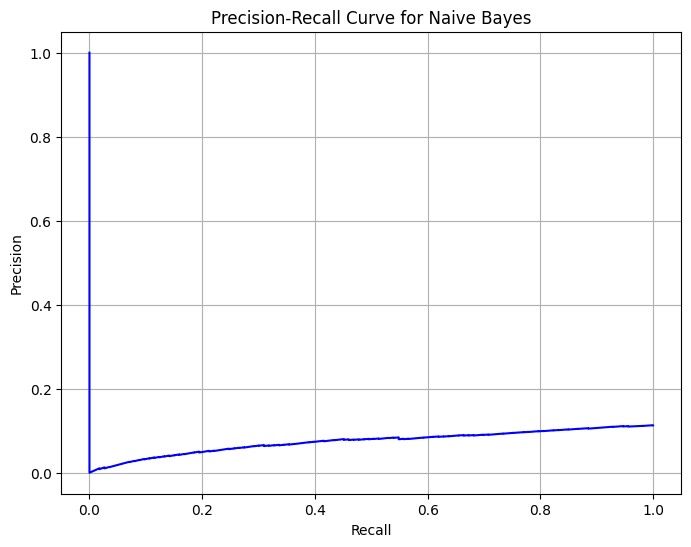

In [ ]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities on the raw test data
# Ensure that X_test is the raw text data
y_scores = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Generate precision-recall data
precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label=1)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()



The Precision-Recall Curve shows that there could be a level at which the model predicts very few positive instances but those few predictions are extremely accurate. The curve starts with high precision but very low recall.
Precision significantly drops as recall rises, which shows us that as the model tries to cover more positive instances, more false positives occur, which lowers precision. Again, not perfect, but we were happy with the results as again, it could be great for further analysis

However, as we can see with the curve, and as mentioned above, it drops very early - The early slump of the curve could mean that increasing the minimum threshold has little effect on precision beyond a given recall level. It might indicate that there are a lot of false negatives or that the model has trouble differentiating between classes after a certain amount of time, however we identified this issue with our confusion matrix.

AUC-ROC Curve

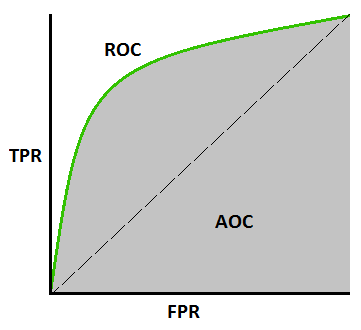

In [ ]:
from IPython.display import Image
Image(filename='auc-roc.png')

We also decided to create a ROC Curve for our models. When a binary classifier system's bias level is changed, its evaluation power is determined using a Receiver Operating Characteristic (ROC) curve. At different threshold settings, it plots the true positive rate (TPR) against the false positive rate (FPR). 

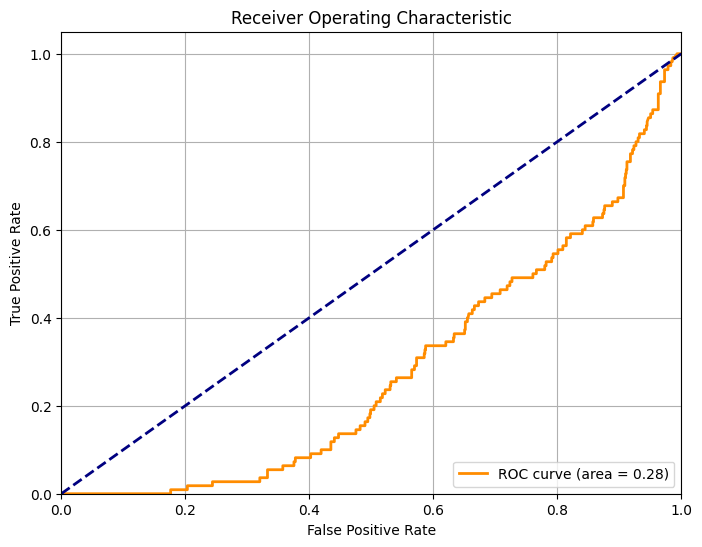

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_scores = best_model.predict_proba(X_test)[:, 1]  # Assuming you are focusing on the 'positive' class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Our ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR), is above the diagonal line that represents random chance. This shows us that the classification model has predictive capability that is better than a random guess, which we felt was the most important thing, there is some accuracy to our predictions.

The area shaded under the ROC curve is referred to as the Area Under the Curve (AOC), which appears to be a mislabeling values. The AUC is a measure of the model's ability to distinguish between the positive and negative classes. The closer the AUC is to 1, the better the model is at predicting positive cases as positive (true positives) and negative cases as negative (true negatives).

In the end the curve approaches the top left corner, showing a high true positive rate and a low false positive rate, we thought this result was good because the positives that are being classified are accurate.

K-Means Clustering

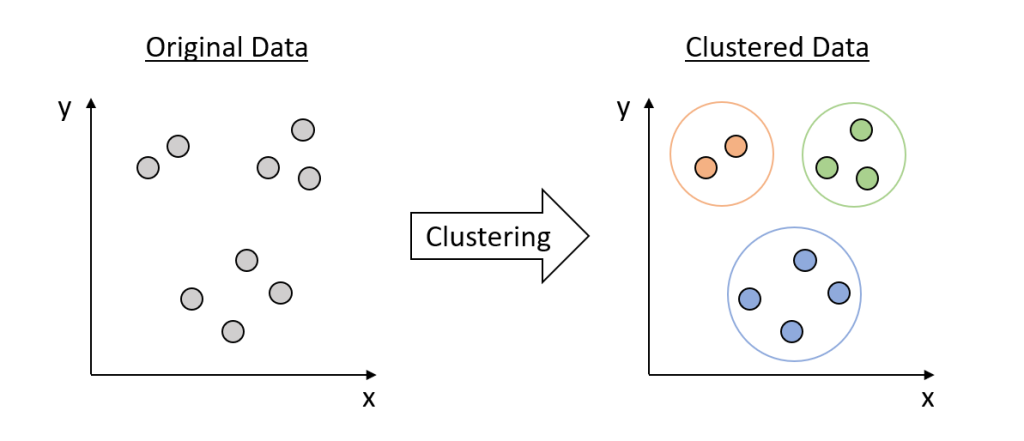

In [ ]:
from IPython.display import Image
Image(filename='cluster.png')

From our studies, we learned that clustering works, in that it groups items that are similar togetehr into different clusters, so in our case, positive will be grouped together, neutral will be grouped together and negative will be grouped together.

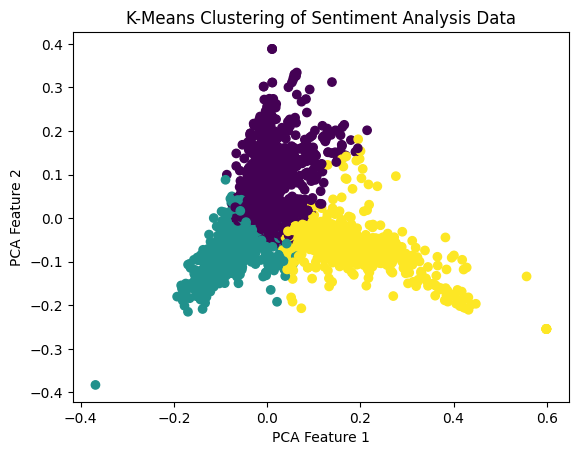

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Vectorizing the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', tokenizer=word_tokenize, max_df=0.85, min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(df['text2'])

# Apply K-Means clustering
num_clusters = 3  # You can choose a different number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# For visualization, we need to reduce the dimensionality
# Using PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# Plotting the clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=clusters)
plt.title("K-Means Clustering of Sentiment Analysis Data")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()


We wanted to analysis the different clusters within our dataset. The first two principal components from a Principal Component Analysis (PCA) are used to visualise a K-Means clustering of our dataset. These clusters, showcase our three classes of positive, negative and neutral. The colours of the cluster groups that the K-Means algorithm assigned to each text based on the similarity of their features—features which are based on the sentiment of the tweet.

### Logistic Regression 

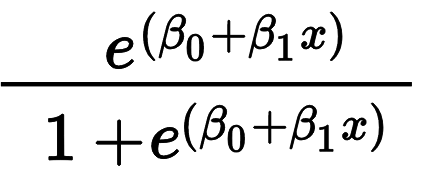

In [ ]:
from IPython.display import Image
Image(filename='regression.png')

Next, we decided to test out a second model so we could do a comparative analysis between 2 models. The model we decided to use next was logistic regression

The probability of the positive category is represented by the formula for logistic regression above, where X stands for input features and z is a linear combination of the input features balanced by coefficients. 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Transform validation and test sets using TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Fit the model with the training data
logistic_regression_model.fit(X_train_smote, y_train_smote)


LogisticRegression()

To get our dataset prepared for modelling, once again, TF-IDF vectorisation is applied to both the validation and test datasets, much like Naive Bayes. We can create a Logistic Regression model using the scikit-learn linear_model module. The same methods of balancing are also used in logistic regression

Cross Validation & Hyperameter Tuning

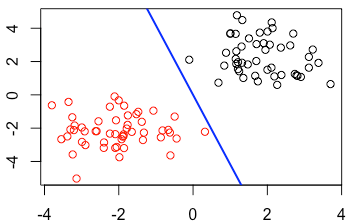

In [ ]:
from IPython.display import Image
Image(filename='converge.png')

In [ ]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize

# Create a pipeline with TfidfVectorizer, SMOTE, and LogisticRegression with default settings
pipeline = make_imb_pipeline(TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english', tokenizer=word_tokenize, max_df=0.85, min_df=2),
                             SMOTE(random_state=42),
                             LogisticRegression())

# Assuming df['text2'] is your features and df['sentiment_number'] is the integer-encoded labels
X = df['text2']
y = df['sentiment_number']

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print accuracy for each fold
for i, score in enumerate(scores, start=1):
    print(f"Accuracy for fold {i}: {score:.4f}")

# Print the average accuracy
print(f"Average accuracy: {scores.mean():.4f}")



/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Instead of tuning parameters, we used simple cross validation folds and got the accuracy of each fold. The reason we went this route instead of tuning parameters like we did for naive bayes was because we experienced a few issues trying to tune tune parameters for logistic regression as we were getting "iterations reached limit" errors, and because of that we coul not find the best value for tuning/ With that being said, cross validation for folds produced some great results, so we were happy to proceed with an average accuracy of 0.63

Classification Report 

In [ ]:
from sklearn.metrics import classification_report

# Ensure that X_test and y_test are defined and contain your test data
# X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform test data

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

        -1.0       0.79      0.54      0.64       798
         0.0       0.09      0.43      0.15        92
         1.0       0.00      0.00      0.00       110

    accuracy                           0.47      1000
   macro avg       0.29      0.32      0.26      1000
weighted avg       0.64      0.47      0.53      1000



Although we found this disappointing, the low precision and recall in the 0 class indicate poor performance in correctly predicting this class. Nevertheless, this could provide useful information for comparative analysis with naive Bayes.

Zero precision and recall indicate that the model is completely unable to predict the 1 class.
Less than half of the predictions are accurate, as indicated by the model's relatively low overall accuracy of 0.47.
The model appears to be underperforming on average across all classes based on the low macro average scores for precision, recall, and f1-score. Given that class -1 has stronger prediction metrics and more support, the weighted average is slightly higher.

Our takeaway from these results is that it is predicting less correctly at a rate of less than 50%, while disappointing, we will later compare how this compares to our naive Bayes model. We processed that maybe naive Bayes would score higher since we tuned our naive Bayes model

Confusion Matrix

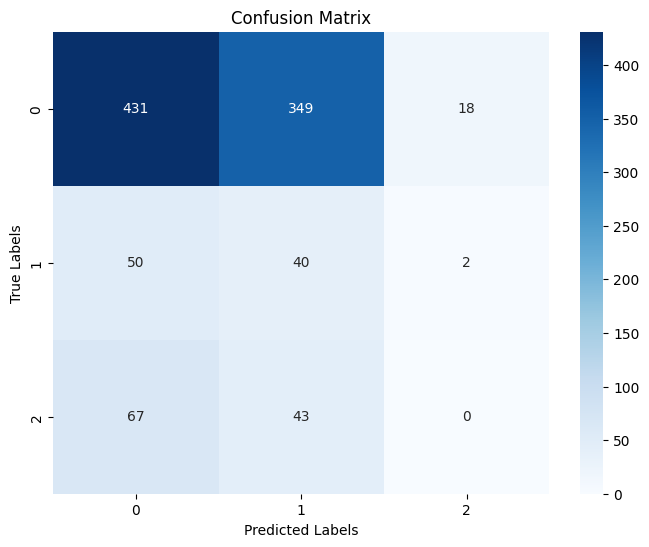

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

With a high percentage of true positives (431), the model predicts class 0, but it also incorrectly labels many cases as class 0 that are actually class 1 (349) and class 2 (18).
Class 1 may be biased in favour of class 0 because it has fewer true positives (40) and is frequently mistakenly assigned to class 0 (50) or class 2 (2).

There are a significant number of misclassifications, which show us that the model's ability to correctly differentiate between the classes could be lacking. This confusion matrix demonstrates that there is a significant amount of confusion between class 0 and class 1, and that the model predicts class 0 more accurately than classes 1 and 2. The model might not have picked up features unique to this class if there were no accurate predictions for class 2.


Again, the model seems to have major issues with correctly predicting data points, especially compared to our naive Bayes model. 

Precision-Recall Curve

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


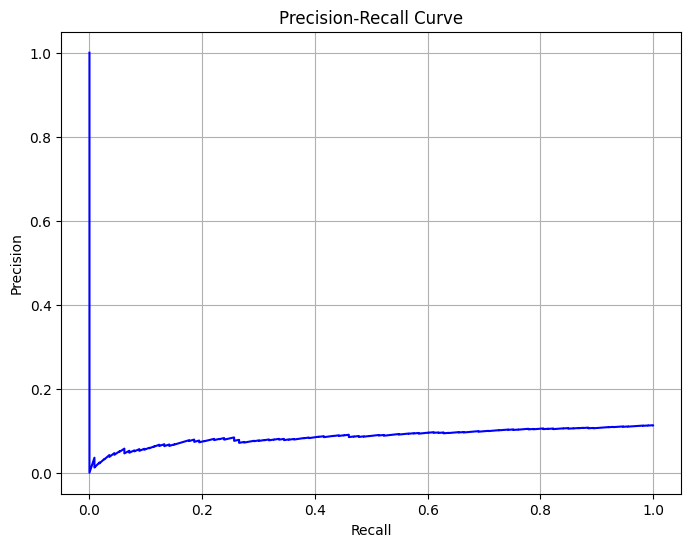

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Split the data into training and test sets if not already split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Generate precision-recall data
precision, recall, thresholds = precision_recall_curve(y_test, y_scores, pos_label = 1)

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()




We found that there was a low recall value, the precision starts at 1.0, which shows a perfect precision, but this is likely at a threshold that is so high it captures very few positive cases, as we have seen in the classification report and confusion matrix.

The precision decreases sharply and then flattens out as recall rises, indicating that the model's ability to make accurate predictions decreases significantly when it attempts to capture more positive instances. The comparatively flat precision line observed at recall values of about 0.1 and higher indicates that the model's ability to differentiate between the positive and negative classes is not great. Once more, supported by our classification report and confusion matrix


The low precision across most recall levels indicates that there are many false positives - non-relevant results being retrieved.
Overall, the curve shows us that the model may have a high number of false positives or a large number of false negatives at different thresholds, which tells us that we may not be well-suited for datasets where a balance between precision and recall is important.

Upon doing some research, we suspected that naive Bayes might be getting stronger results since it is a classification model, compared to the regression model of logistic regression

AUC-ROC Curve

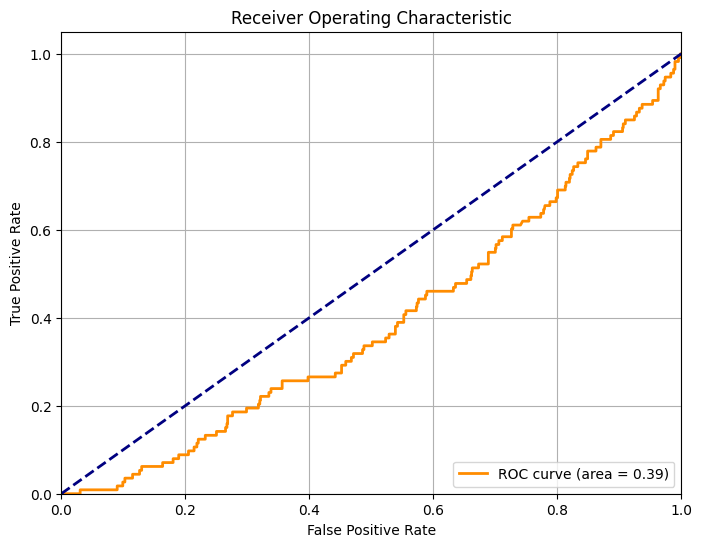

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_scores = pipeline.predict_proba(X_test)[:, 1]   # Assuming you are focusing on the 'positive' class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Once again, we also created a ROC Curve for Logistic Regression.

Our model's AUC of 0.39 suggests that it performs noticeably worse than random guessing. This shows us that the model might not have fully absorbed the underlying patterns in the data and is struggling to make a meaningful distinction between the two classes.

The ROC curve's rough shape raises the possibility that the model performs poorly at some thresholds while generating all of its accurate predictions at a select few.

This was an interesting analysis for logistic regression. We weren't happy with the results, however, text classification datasets always have the risk of running into problems like this with some models, especially when so many preprocessing techniques are used such as emoji to text, stop words, TF-IDF etc. In the future, we probably wouldn't consider a logistic regression model and instead, use a different classification model like a decision tree or random forests. 

### Naive Bayes vs Logistic Regression - Which Model Was Stronger?

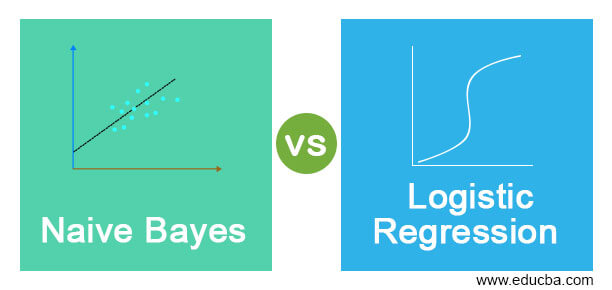

In [ ]:
from IPython.display import Image
Image(filename='naive_bayes_regression.png')

Our key takeaways from our models are as follows:

Naive Bayes:

Our Naive Bayes model showed a high degree of precision, especially in the negative class, indicating that it was very effective at detecting true negatives. It also showed a trade-off with recall, which was lower than expected, which as we know, there was still some presence of some false negatives. Our model also benefited from simplicity and speed, which made it a great for this kind of dataset that involves text classification.

Logistic Regression:

Showed a more balanced performance across different classes compared to Naive Bayes. However, our model struggled to classify a lot of datapoints. We observed asignificant number of misclassifications, which show us that the model's ability to correctly differentiate between the classes is lacking. Comparing this to naive bayes, when it came to classificaiton, naive bayes was stronger. 

Comparison and Strengths:

Ultimately, the Naive Bayes model demonstrated superior performance when accuracy is critical, particularly in accurately identifying negative sentiments in the dataset.
Datasets requiring balanced sensitivity to all classes may benefit from Logistic Regression's more consistent performance across sentiment classes, even though it was not as accurate for negative sentiments as Naive Bayes. So while Logistic Regressin has its perks, if we were to pick one of the two models, we would go for Naive Bayes, since our main goal is to correctly classify sentiment

# Part 5: Final Observations and Conclusion

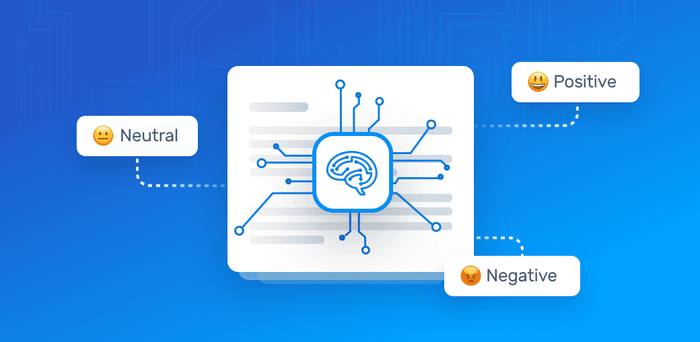

In [ ]:
from IPython.display import Image
Image(filename='sentiment.png')

Our project was an outlook sentiment analysis of stock market-related tweets over a period marked by the COVID-19 pandemic. The analysis aimed to understand the correlation between public sentiment and stock market performance, which can be invaluable for investors' decision-making processes. The dataset, primarily composed of tweets in English, provided a robust platform for analysis despite its language and timeframe limitations (since it only focused on COVID-19 entires).

Exploratory Data Analysis:
The dataset's structure was revealed during the exploratory phase, which also revealed a sizable amount of data with a balanced representation of sentiments. The main patterns and sentiments found in the dataset were first visualised using word clouds and sentiment distribution charts.

Data Preparation & Cleaning:
The data cleaning process was tasking, involving tokenisation, handling of null values, and normalisation of text. Emojis were converted to text, and other noise elements were removed to ensure the cleanliness of the data for analysis.

Vectorisation & Feature Engineering:
We applied TF-IDF vectorisation which transformed the textual data into a numerical format suitable for machine learning models. Feature engineering, including topic modeling, further refined the dataset by identifying underlying themes and groupings within the tweets.

Model Training & Evaluation:
Naive Bayes and Logistic Regression models were trained on the dataset. The Naive Bayes model showed a high precision for negative sentiments, while Logistic Regression had difficulties with correctly identifying data points in classes. Both models underwent cross-validation and hyperparameter - for naive bayes (we didn't tune hyperameter for Logistic Regression)  to optimise their performance.

Model Comparison:
The comparison between Naive Bayes and Logistic Regression demonstrated that while Naive Bayes had high precision in certain areas, Logistic Regression offered a more balanced approach across different classes, though with some limitations in predicting positive sentiments accurately.

Class Imbalance & SMOTE:
Since we converted to numerical vectors we used SMOTE to address class imbalance, which was evident in the initial dataset. This technique ensured a more balanced distribution of sentiment classes, in which we got 33.3% across the board, leading to a more generalised model performance.

Conclusion:
Our project's sentiment analysis revealed key insights into the stock market's movements during an unstable period, such as COVID-19. The final models, while showcasing some strengths and weaknesses, proved the use of using sentiment analysis in predicting market trends. Our project emphasised the importance of data preparation and the selection of appropriate machine learning models for textual data analysis. We know now, going forward, that we probably won't use a Logistic Regression model for this type of dataset.

### 

### 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4ee8fc2-2ef3-4536-ae0f-297f9a2690da' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>